# Initializer Comparison with ReLU Activation

In [2]:
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import OrderedDict

In [3]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(self.x, self.W) + self.b
        return out

    def backward(self, din):
        dx = np.dot(din, self.W.T)
        self.dW = np.dot(self.x.T, din)
        self.db = np.sum(din, axis=0)
        return dx

In [4]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, din):
        dx = din * self.out * (1.0 - self.out)
        return dx
    
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, din):
        din[self.mask] = 0
        dx = din
        return dx

## Five layers and Activation Values

In [5]:
def activation_value_histogram(layers, num_epoch):
    x = np.random.randn(1000, 100) # 1000 x 100
    y = np.ones((1000, 100))

    num_layers = len(layers)
    activations = OrderedDict()
    backward_activations = OrderedDict()
    
    avg_forward_std = []
    avg_backward_std = []

    for epoch in range(num_epoch):
        print("Epoch:", epoch)
        # Forward
        for i in range(num_layers):
            if i != 0:
                x = activations[i-1]
            activations[i] = layers[i].forward(x)

        # Backward    
        for i in reversed(range(num_layers)):
            if i != num_layers - 1:
                y = backward_activations[i+1]
            backward_activations[i] = layers[i].backward(y)

        # Parameter Update
        for i in range(num_layers):
            if i % 2 == 0:
                layers[i].W = layers[i].W - 0.01 * layers[i].dW
                layers[i].b = layers[i].b - 0.01 * layers[i].db

        # Histograms of Forward Activation Values
        print("Forward Activations")
        forward_std_sum = 0.0
        f, axarr = plt.subplots(1, num_layers, figsize=(25, 5))
        for i, a in activations.items():
            values = list(a.flatten())
            std = "{:5.4f}".format(np.std(values))
            forward_std_sum += float(std)
            axarr[i].hist(values, 20)
            if i % 2 == 0:
                axarr[i].set_title(str(i+1) + "-Layer ($\sigma=$" + std + ")")
            else:
                axarr[i].set_title("ReLU Layer ($\sigma=$" + std + ")")
        avg_forward_std.append(forward_std_sum / num_layers)       
        f.subplots_adjust(wspace=0.5)
        plt.show()

        # Histograms of Backward Activation Values    
        print("Backward Activations")
        backward_std_sum = 0.0
        f, axarr = plt.subplots(1, num_layers, figsize=(25, 5))
        for i, b in backward_activations.items():
            values2 = list(b.flatten())
            std = "{:5.4f}".format(np.std(values2))
            backward_std_sum += float(std)
            axarr[i].hist(values2, 20)
            if i % 2 == 0:
                axarr[i].set_title(str(i+1) + "-Layer ($\sigma=$" + std + ")")
            else:
                axarr[i].set_title("ReLU Layer ($\sigma=$" + std + ")")
        avg_backward_std.append(backward_std_sum / num_layers)        
        f.subplots_adjust(wspace=0.5)
        plt.show()
    return avg_forward_std, avg_backward_std

## 1. Weight and Bias Variation with ReLU Activation

In [6]:
markers = {"Zero": "o", "N(0.0, 1.0)": "x", "N(0.0, 0.0001)": "s", "Xavier": "o", "He": "x"}

avg_forward_std_dic = OrderedDict()
avg_backward_std_dic = OrderedDict()

### 1) Only Zero Values
- Weight Distribution: $W = 0$
- Bias Distribution: $B = 0$

Epoch: 0
Forward Activations


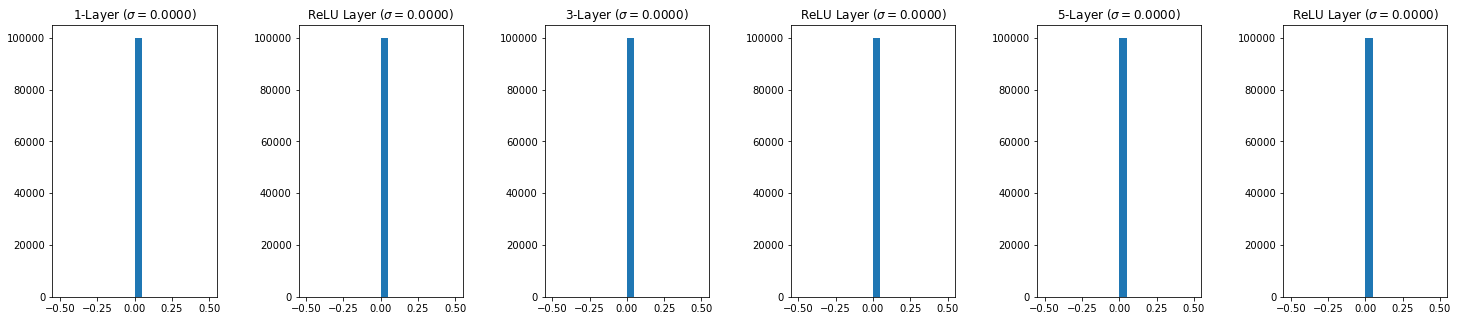

Backward Activations


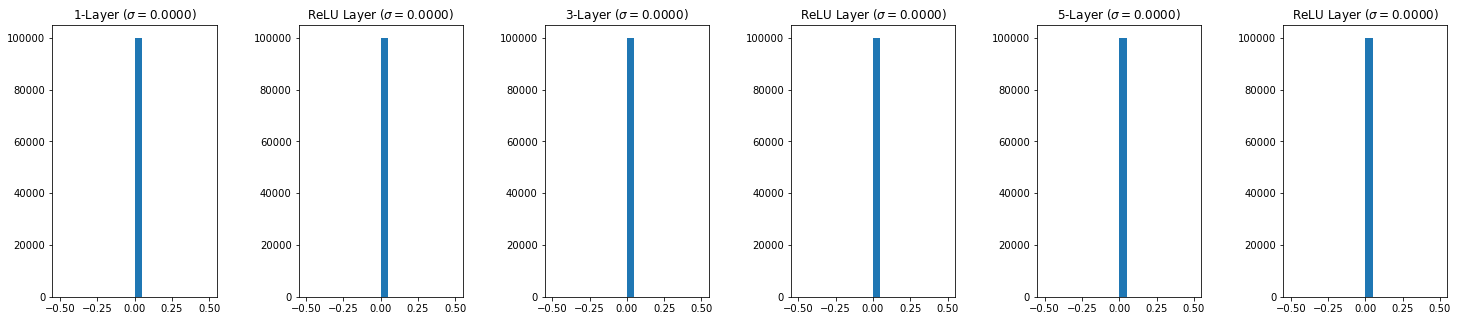

Epoch: 1
Forward Activations


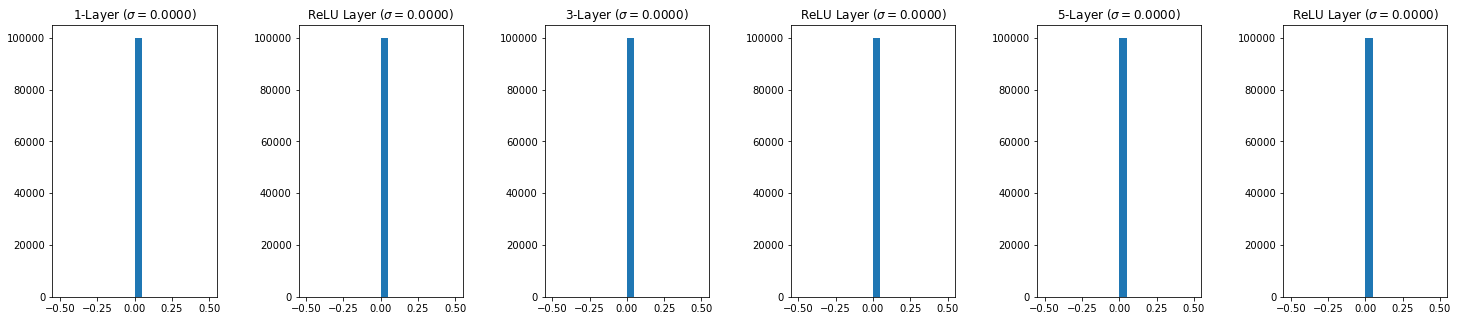

Backward Activations


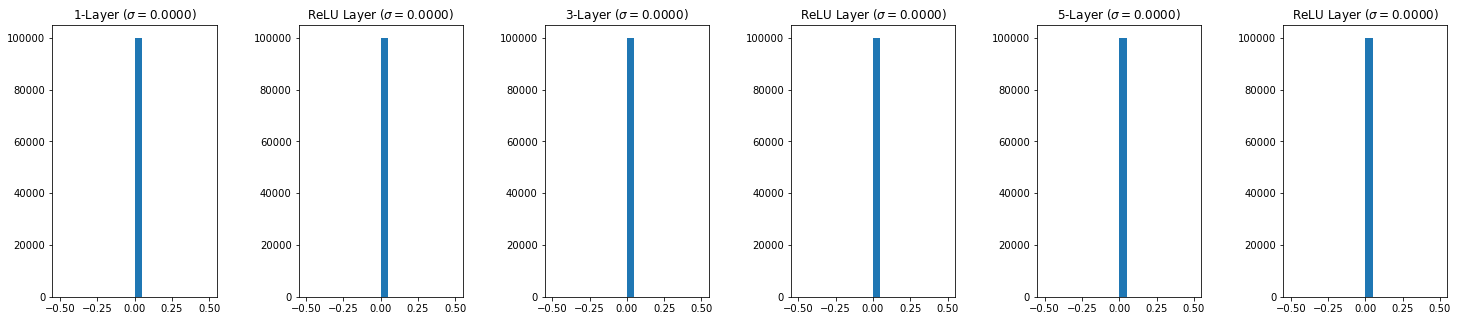

Epoch: 2
Forward Activations


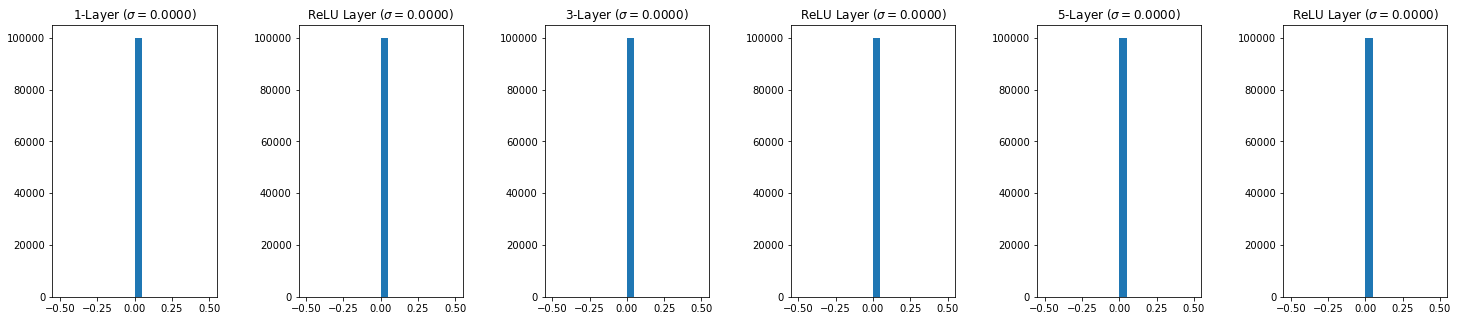

Backward Activations


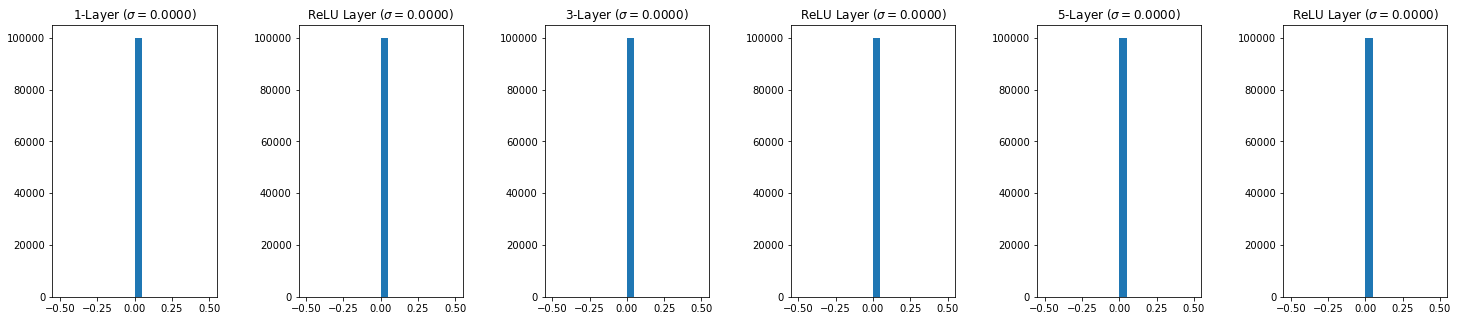

Epoch: 3
Forward Activations


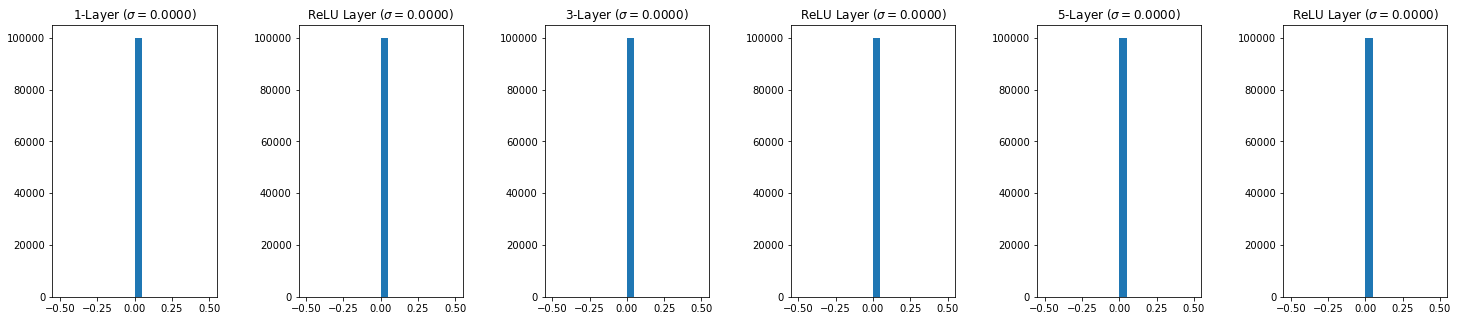

Backward Activations


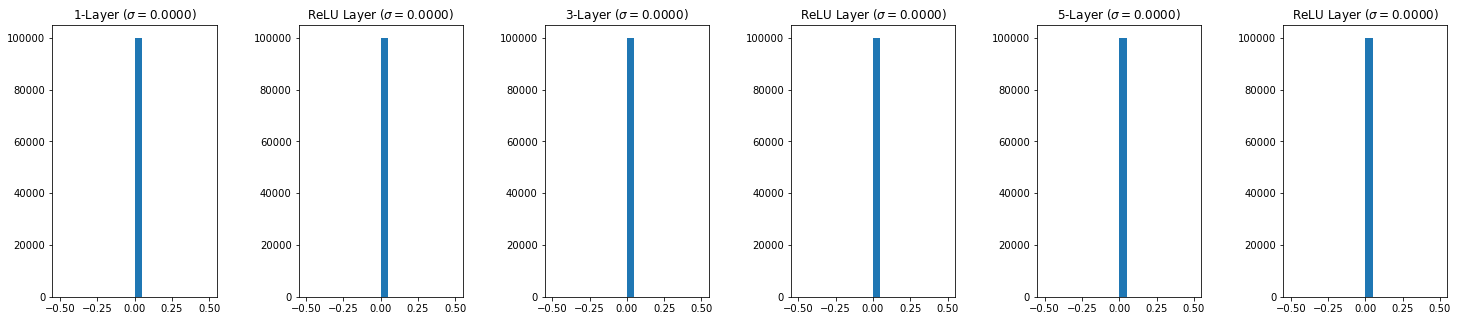

Epoch: 4
Forward Activations


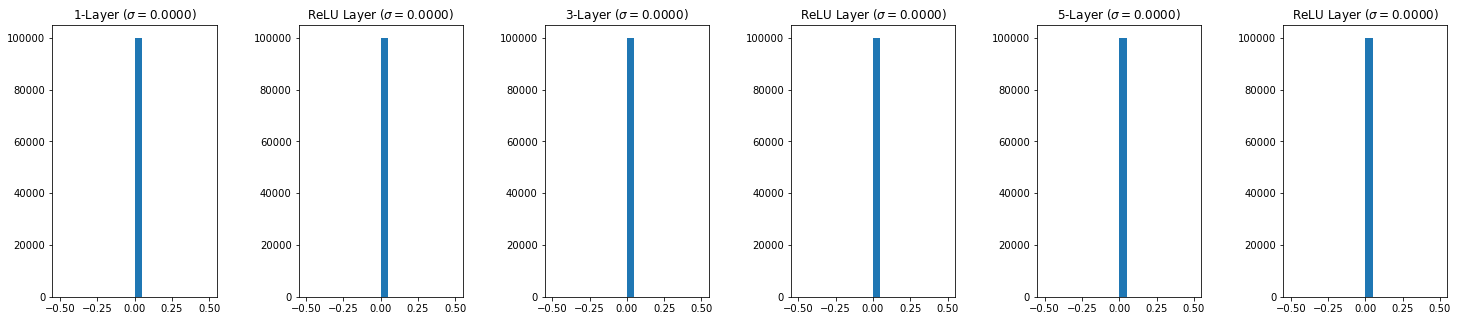

Backward Activations


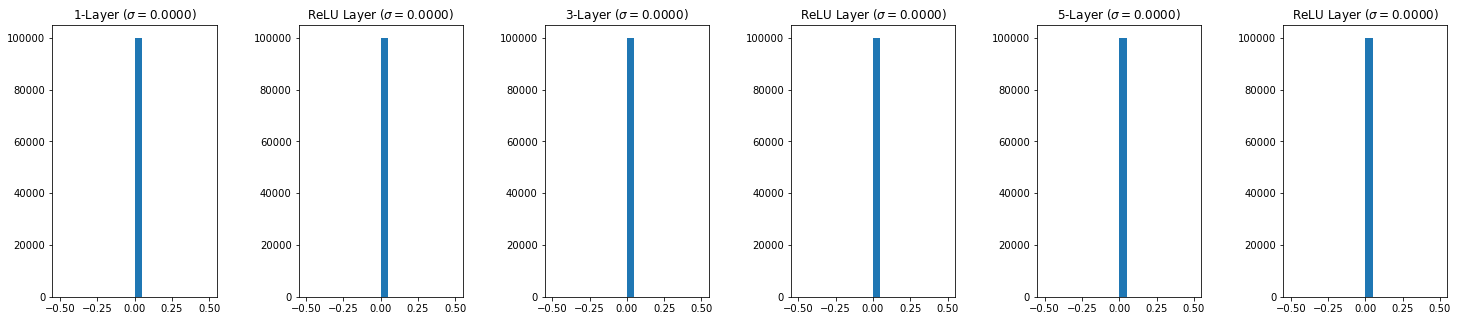

[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]


In [7]:
node_num = 100 #각 은닉층의 노드 수
num_layers = 6 # 3개의 은닉층 + 3개의 활성화층
num_epochs = 5

layers = OrderedDict()

for i in range(num_layers):
    if i % 2 == 0:
        w = np.zeros((node_num, node_num))
        b = np.zeros(node_num)
        layers[i] = Affine(w, b)
    else:    
        layers[i] = Relu()

avg_forward_std, avg_backward_std = activation_value_histogram(layers, num_epochs)
avg_forward_std_dic['Zero'] = avg_forward_std
avg_backward_std_dic['Zero'] = avg_backward_std
print(avg_forward_std)
print(avg_backward_std)

### 2) Standard Normal Distribution
- Weight Distribution: $W \sim N(0, 1)$
- Bias Distribution: $B \sim N(0, 1)$

Epoch: 0
Forward Activations


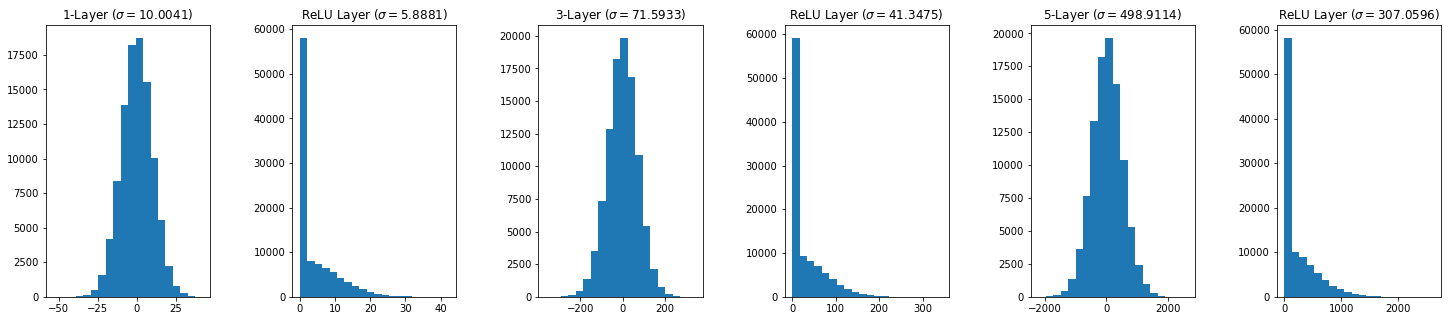

Backward Activations


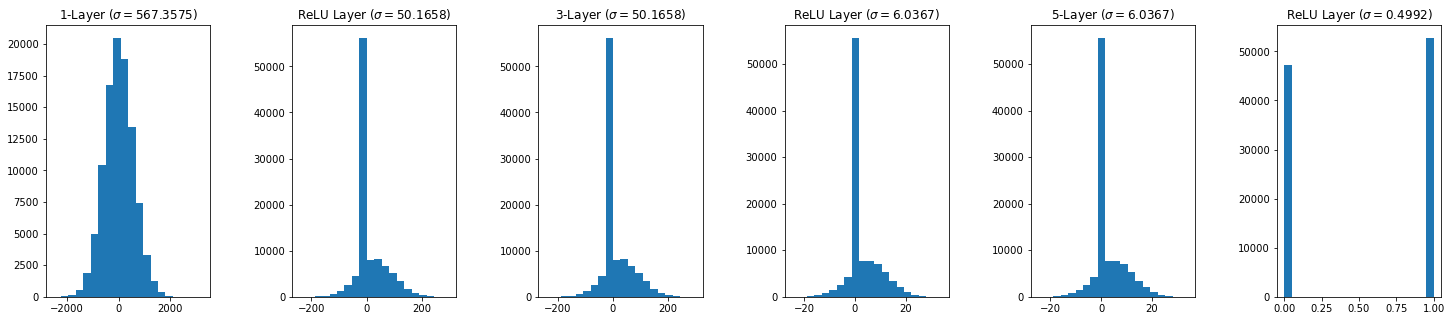

Epoch: 1
Forward Activations


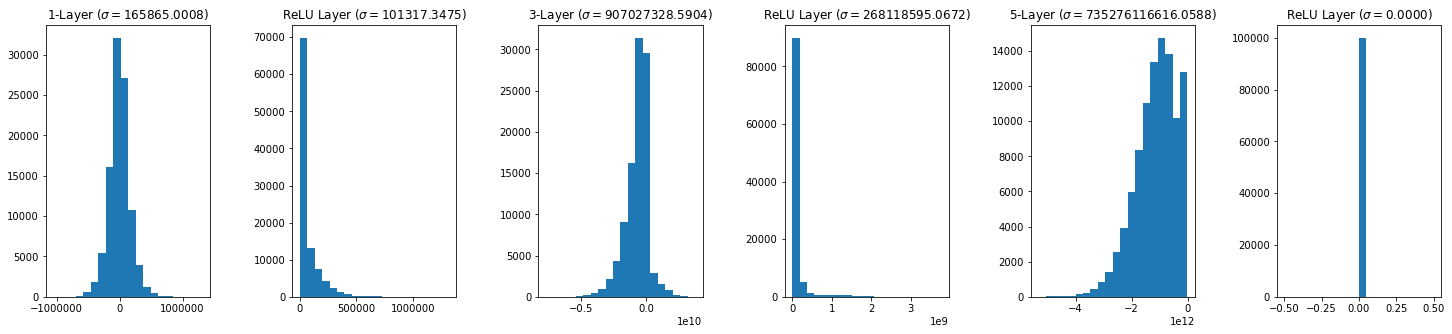

Backward Activations


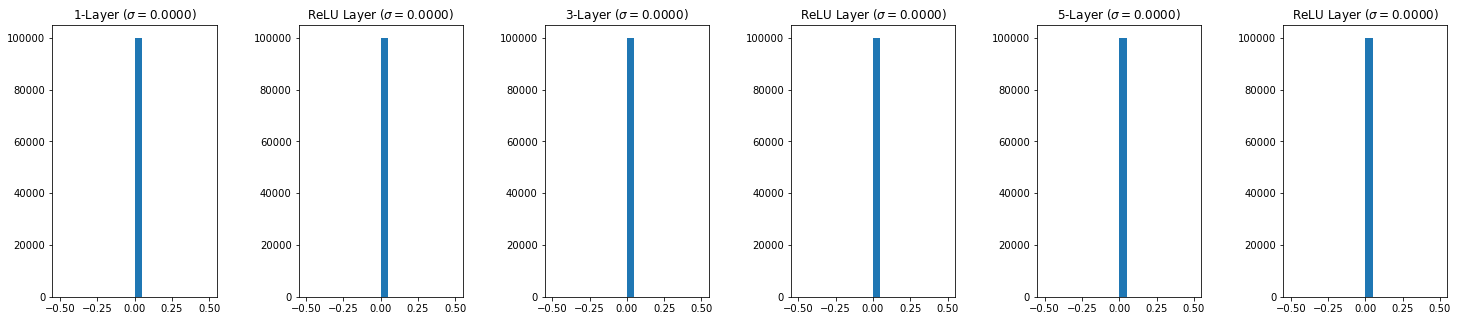

Epoch: 2
Forward Activations


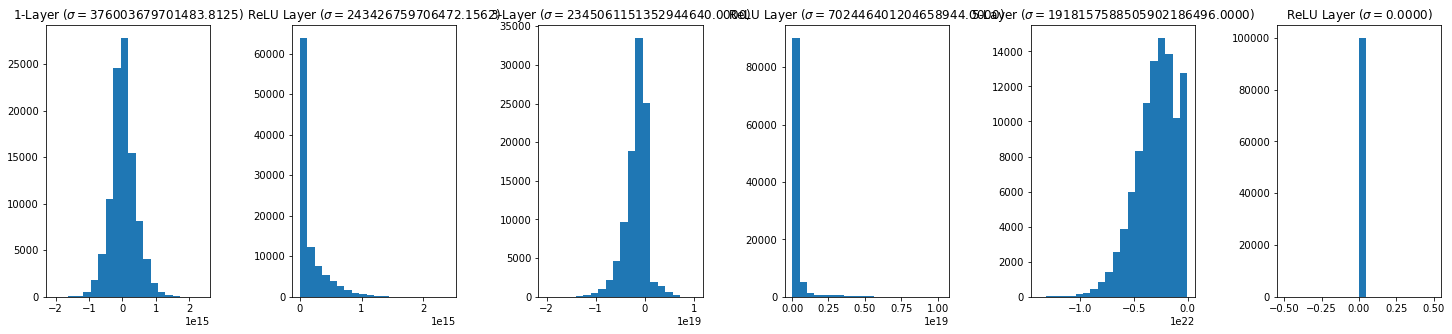

Backward Activations


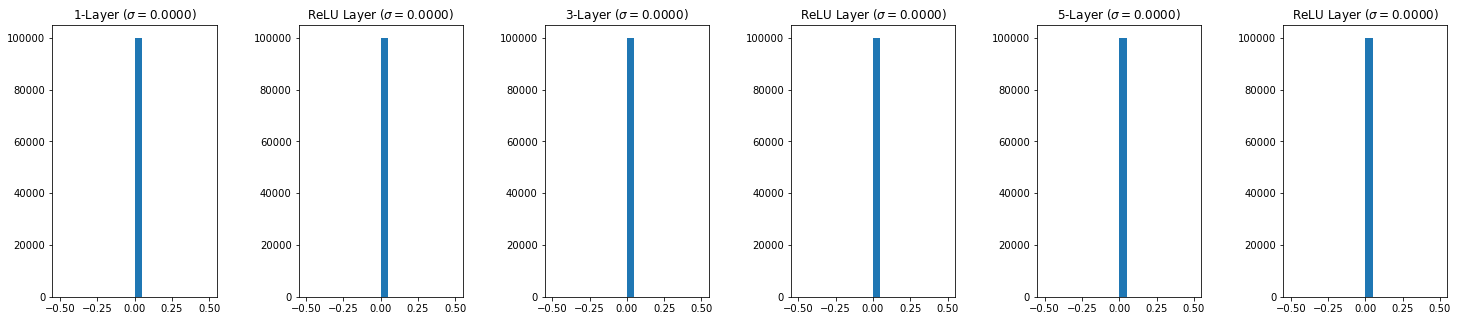

Epoch: 3
Forward Activations


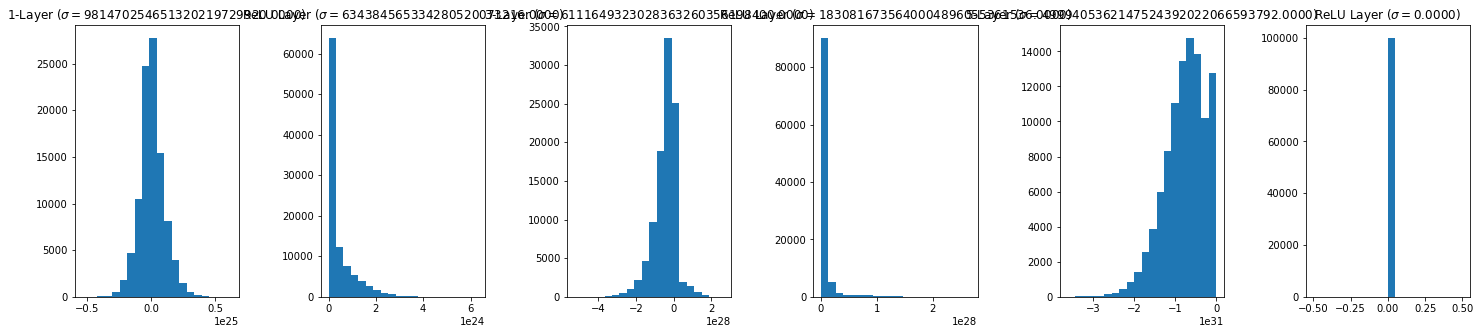

Backward Activations


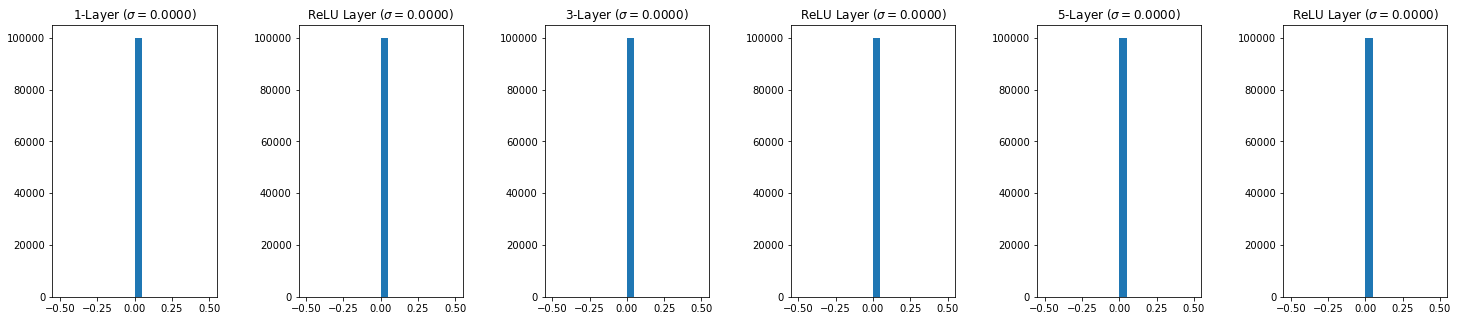

Epoch: 4
Forward Activations


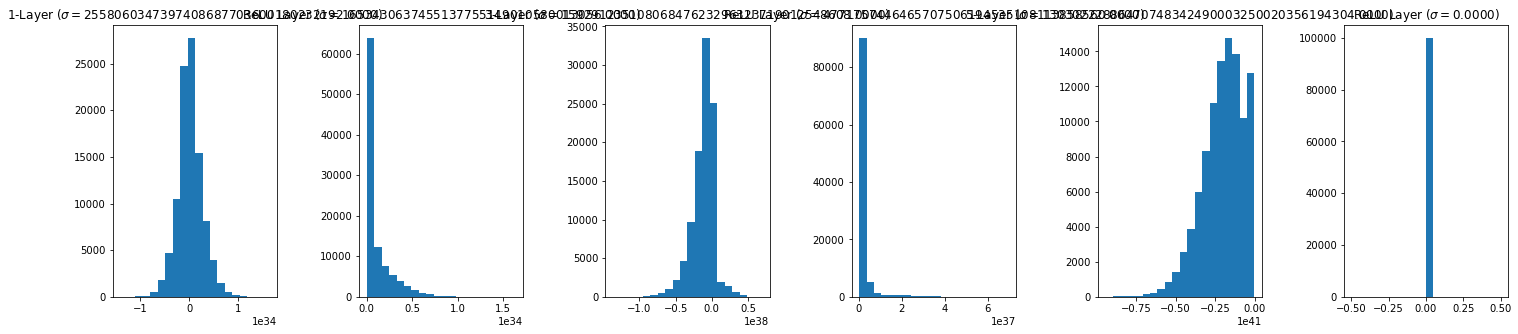

Backward Activations


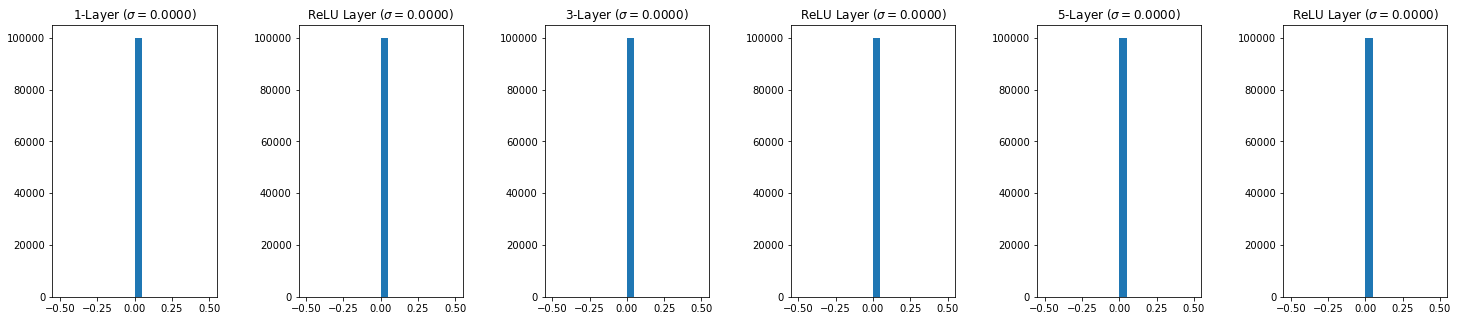

[155.80066666666667, 122741921620.34412, 3.202009525814832e+20, 8.345582406768355e+29, 2.1751546631531676e+39]
[113.37695000000001, 0.0, 0.0, 0.0, 0.0]


In [7]:
node_num = 100 #각 은닉층의 노드 수
num_layers = 6 # 3개의 은닉층 + 3개의 활성화층
num_epochs = 5

layers = OrderedDict()

for i in range(num_layers):
    if i % 2 == 0:
        w = np.random.randn(node_num, node_num)
        b = np.random.randn(node_num)
        layers[i] = Affine(w, b)
    else:    
        layers[i] = Relu()

avg_forward_std, avg_backward_std = activation_value_histogram(layers, num_epochs)
avg_forward_std_dic['N(0.0, 1.0)'] = avg_forward_std
avg_backward_std_dic['N(0.0, 1.0)'] = avg_backward_std
print(avg_forward_std)
print(avg_backward_std)

### 3) Standard Normal Distribution where Standard Deviation is 0.01 
- Weight Distribution: $W \sim N(0, 0.0001)$
- Bias Distribution: $B \sim N(0, 0.0001)$

Epoch: 0
Forward Activations


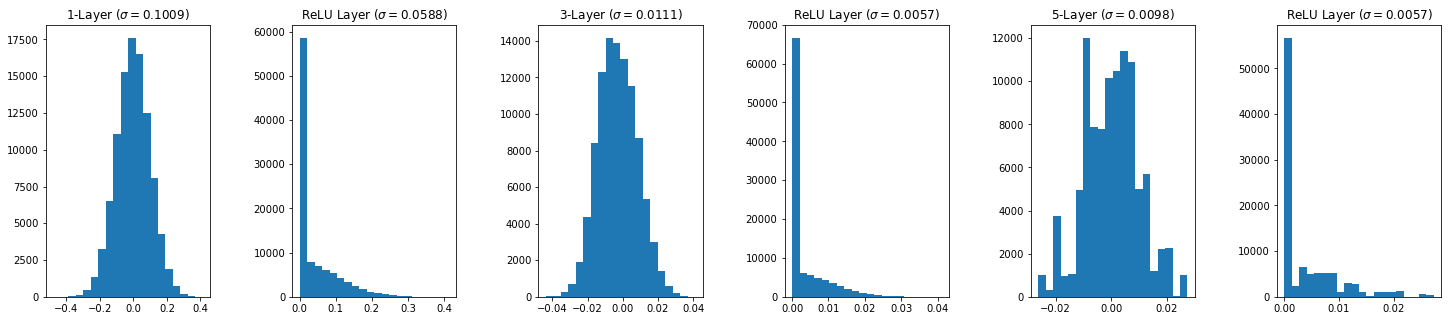

Backward Activations


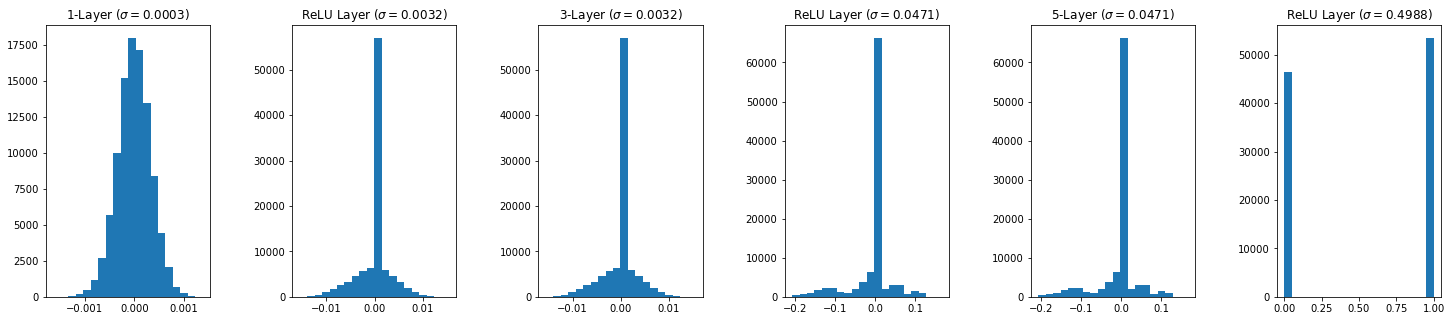

Epoch: 1
Forward Activations


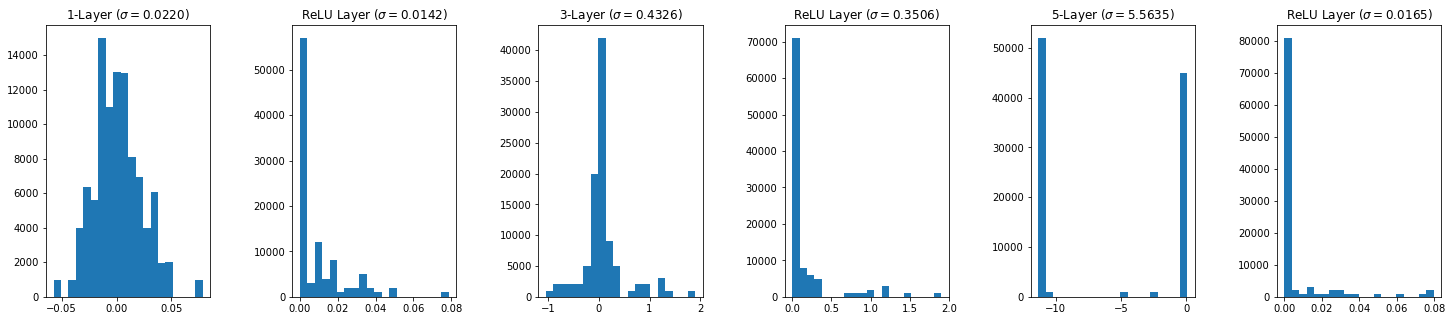

Backward Activations


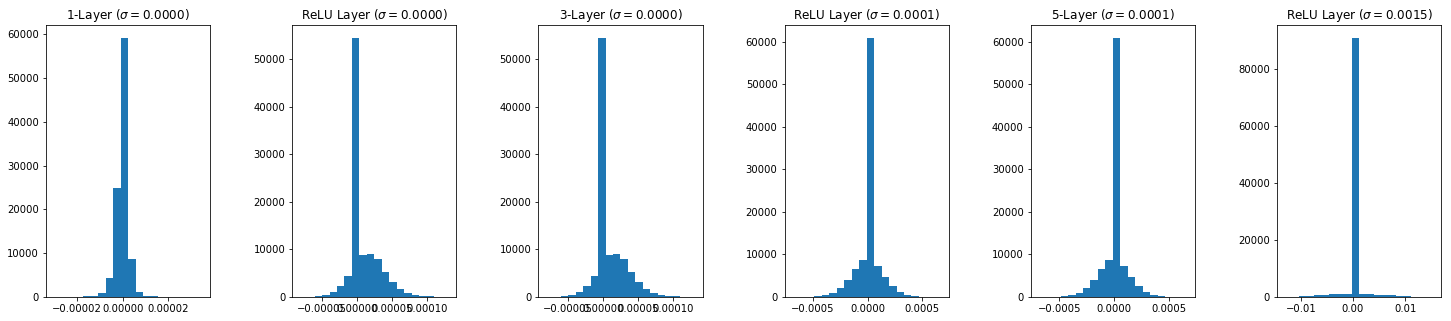

Epoch: 2
Forward Activations


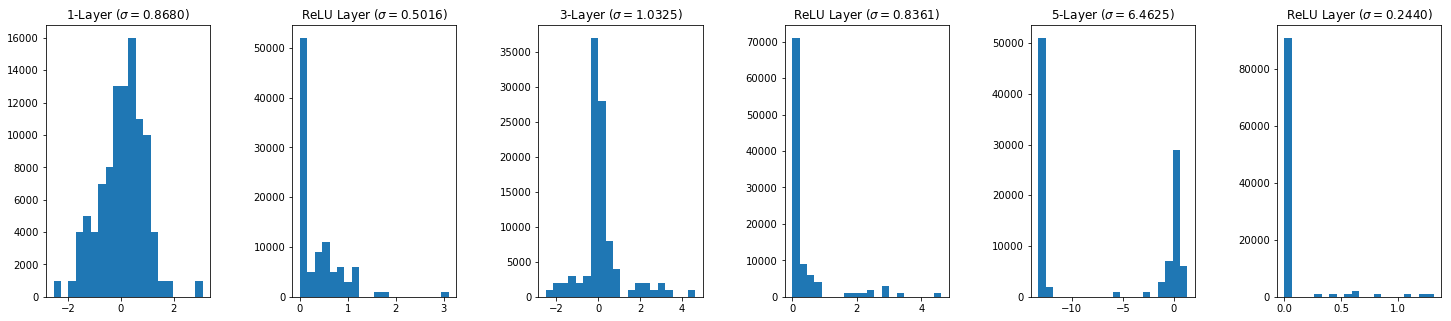

Backward Activations


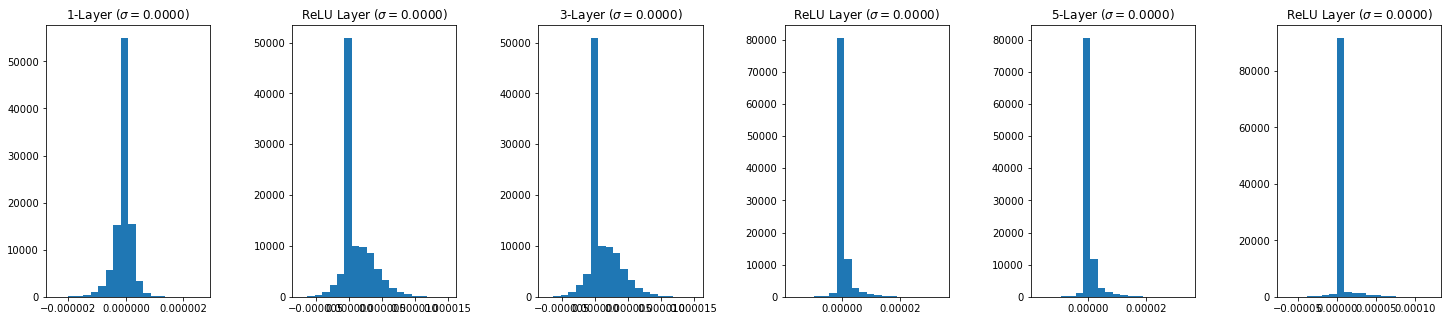

Epoch: 3
Forward Activations


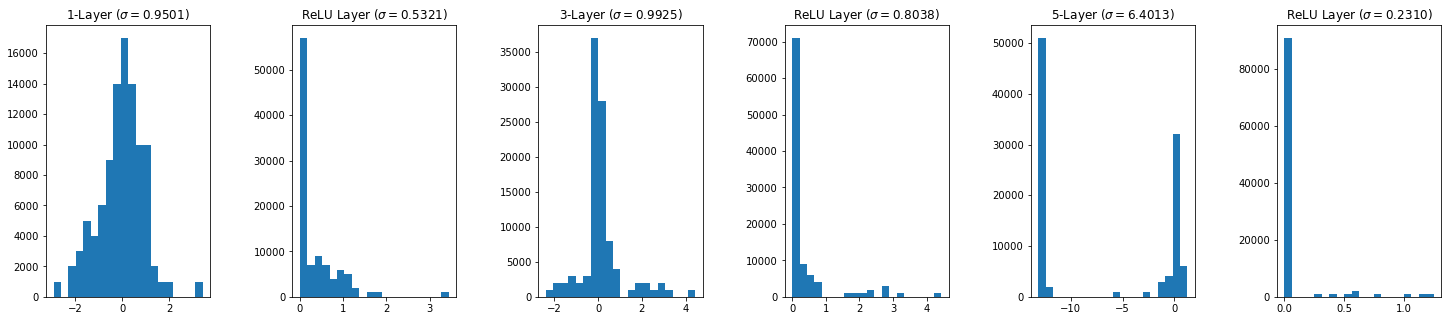

Backward Activations


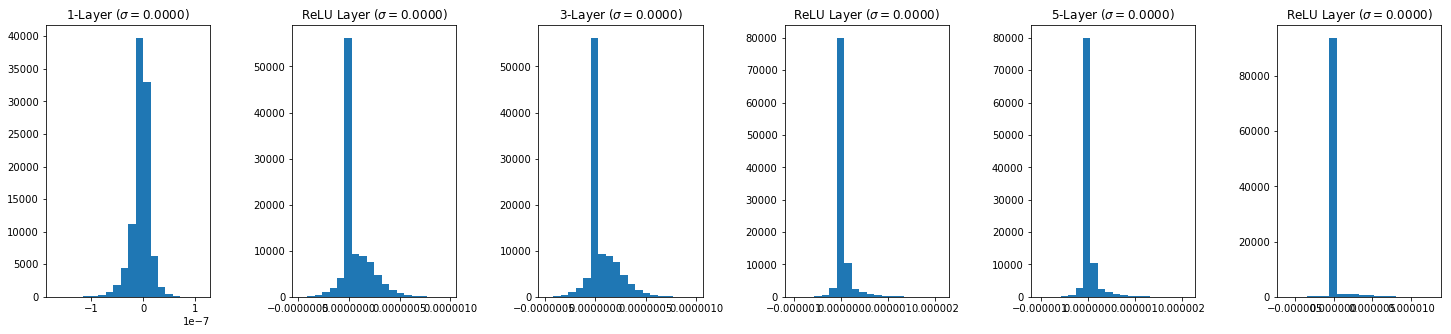

Epoch: 4
Forward Activations


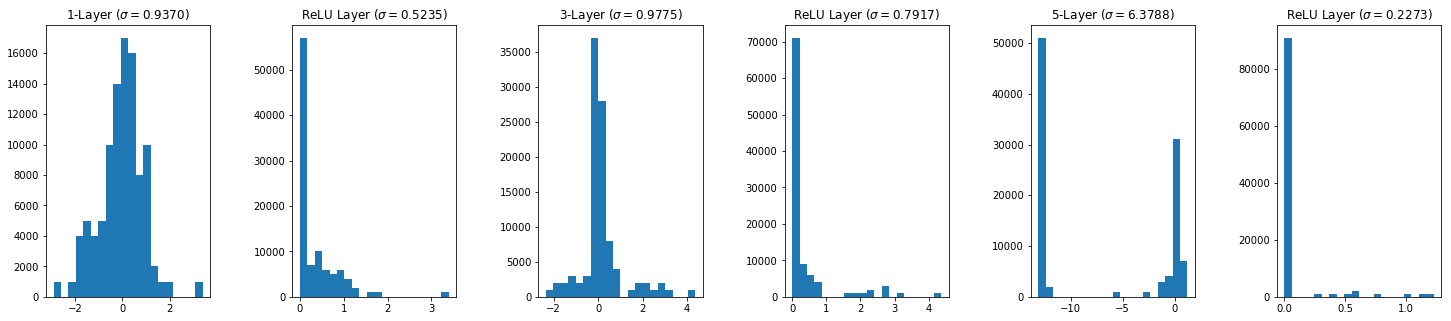

Backward Activations


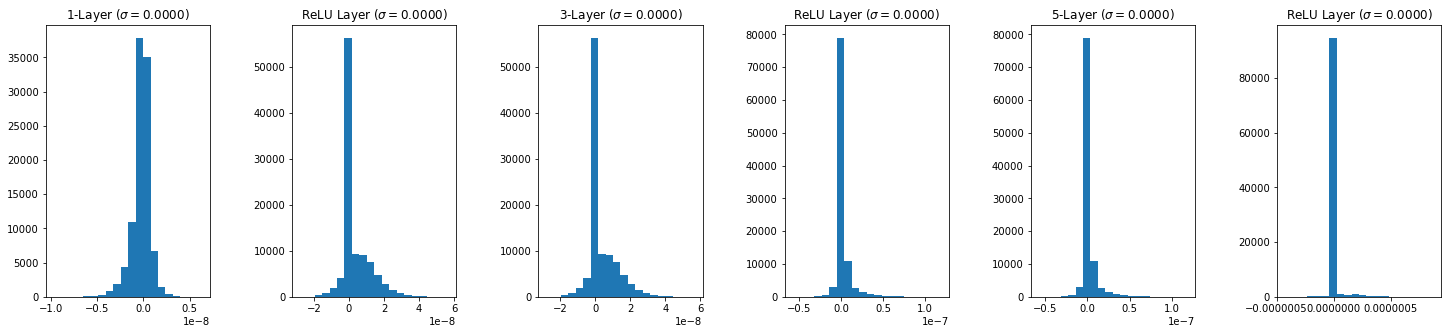

[0.03200000000000001, 1.0665666666666667, 1.65745, 1.6518, 1.6392999999999998]
[0.09995, 0.00028333333333333335, 0.0, 0.0, 0.0]


In [8]:
node_num = 100 #각 은닉층의 노드 수
num_layers = 6 # 3개의 은닉층 + 3개의 활성화층
num_epochs = 5

layers = OrderedDict()

for i in range(num_layers):
    if i % 2 == 0:
        w = np.random.randn(node_num, node_num) * 0.01
        b = np.random.randn(node_num) * 0.01
        layers[i] = Affine(w, b)
    else:    
        layers[i] = Relu()

avg_forward_std, avg_backward_std = activation_value_histogram(layers, num_epochs)
avg_forward_std_dic['N(0.0, 0.0001)'] = avg_forward_std
avg_backward_std_dic['N(0.0, 0.0001)'] = avg_backward_std
print(avg_forward_std)
print(avg_backward_std)

### 4) Xavier Initializer where Standard Deviation is $1 \over \sqrt{n}$ ($n$ is the number of neurons in the previous layer)
- Weight Distribution: $W \sim N(0, {1 \over n})$
- Bias Distribution: $B \sim N(0, {1 \over n})$

Epoch: 0
Forward Activations


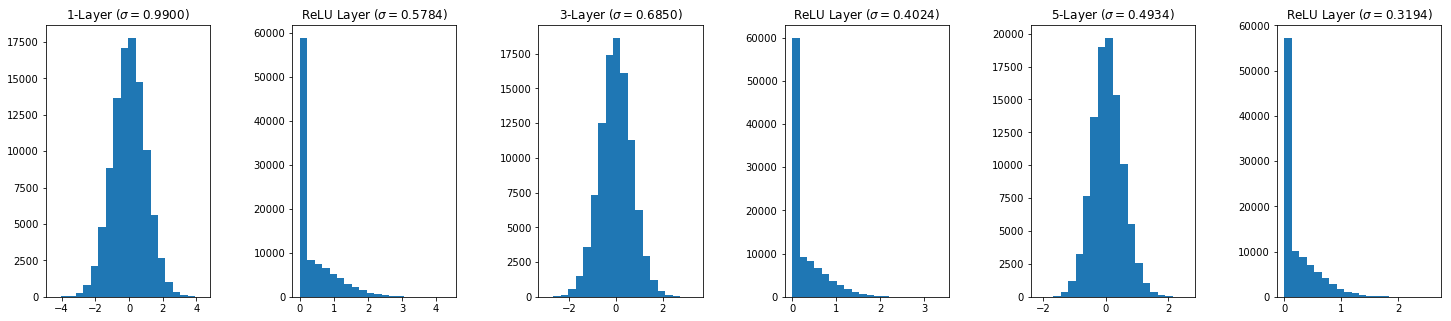

Backward Activations


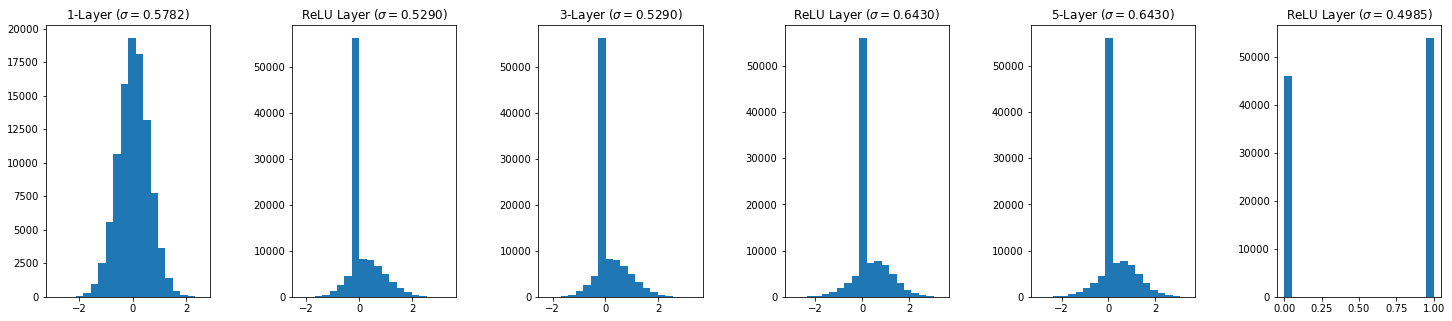

Epoch: 1
Forward Activations


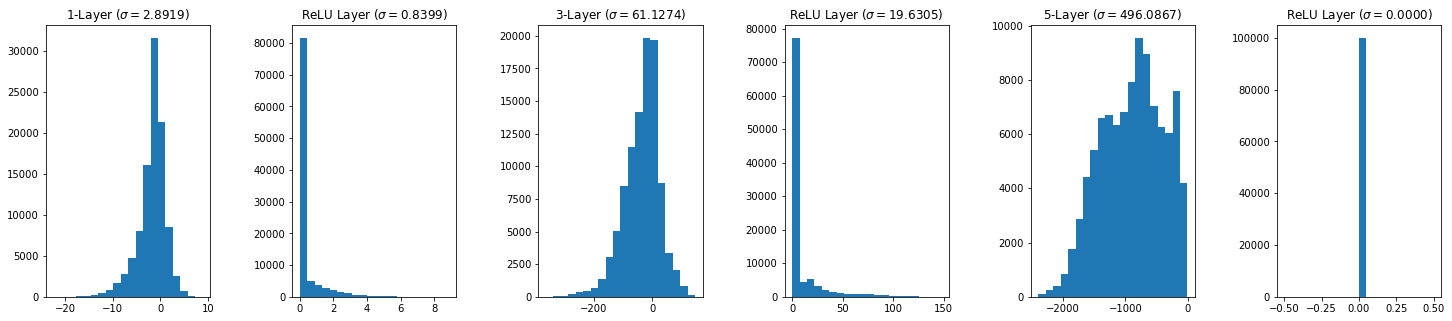

Backward Activations


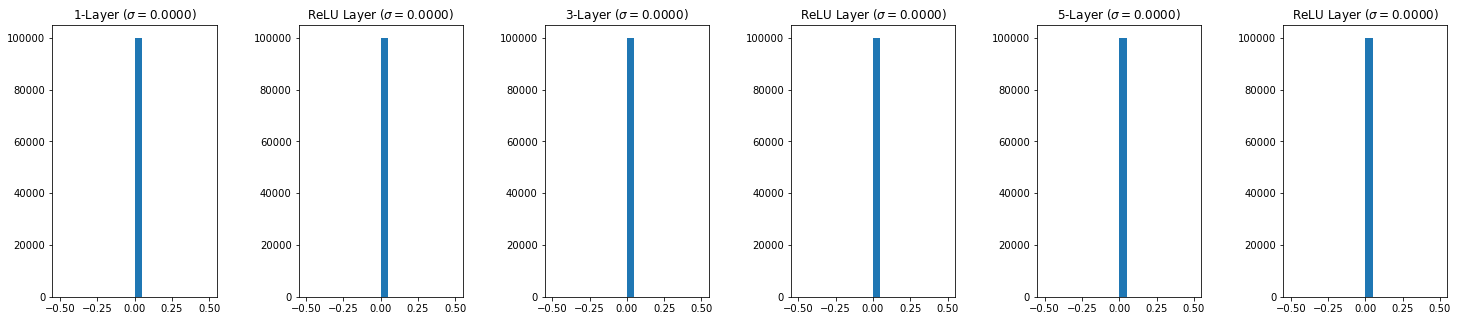

Epoch: 2
Forward Activations


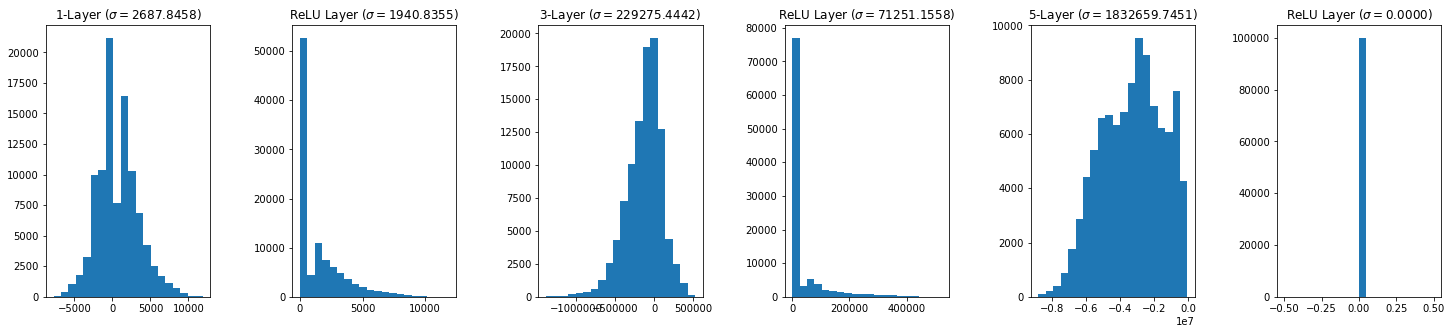

Backward Activations


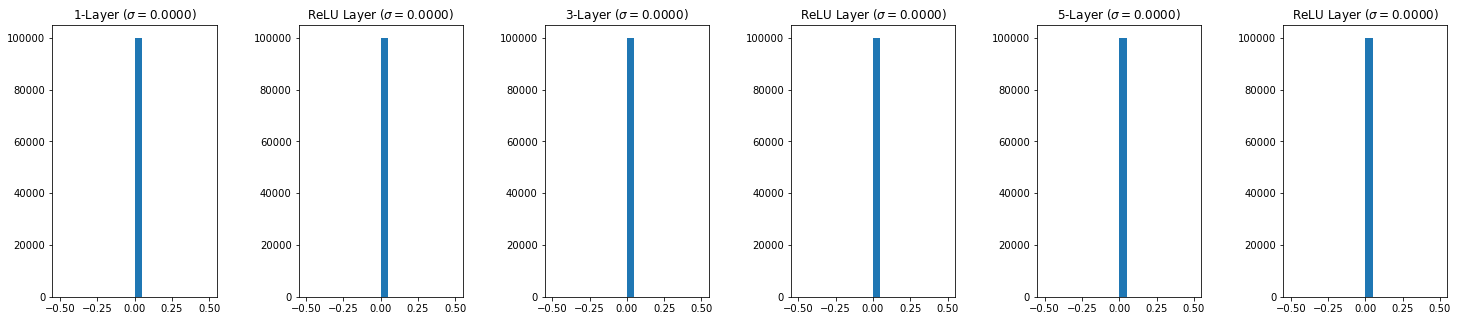

Epoch: 3
Forward Activations


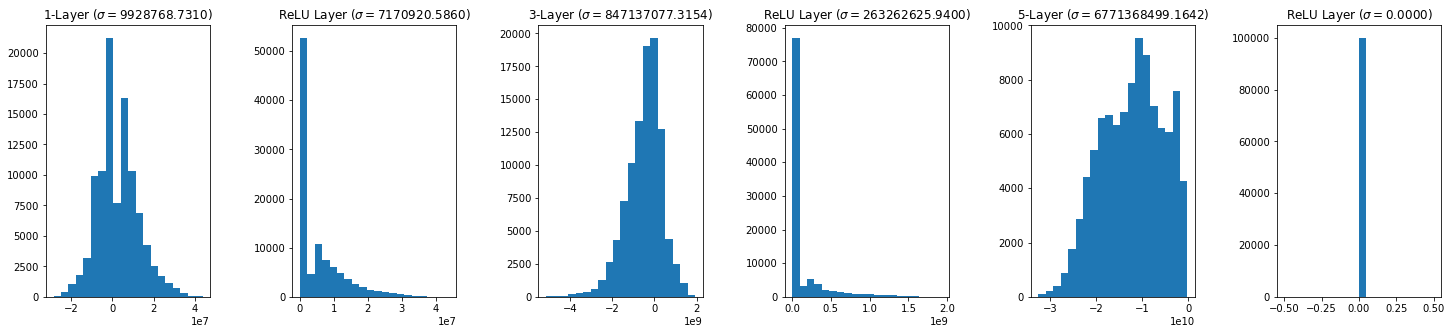

Backward Activations


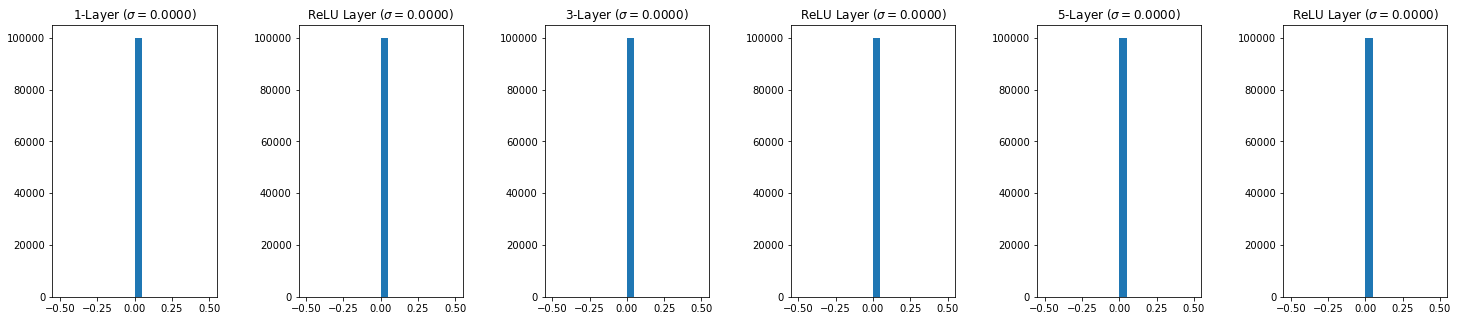

Epoch: 4
Forward Activations


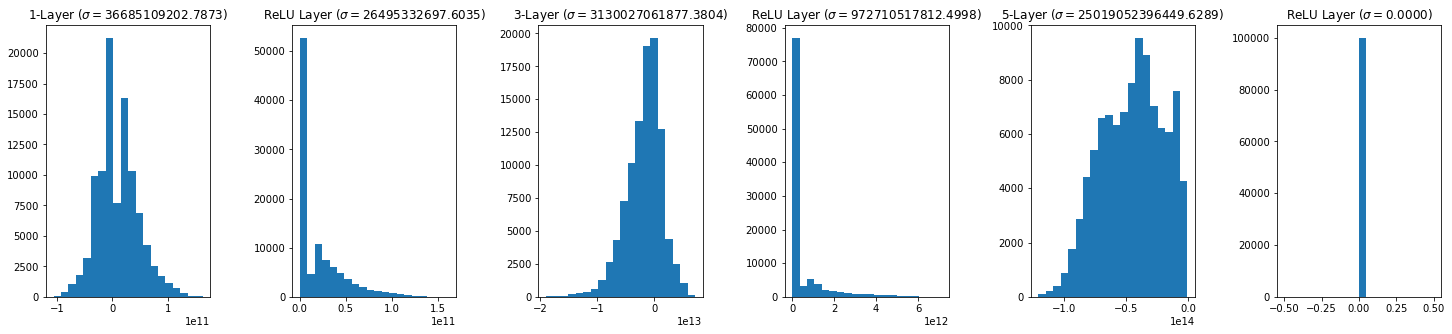

Backward Activations


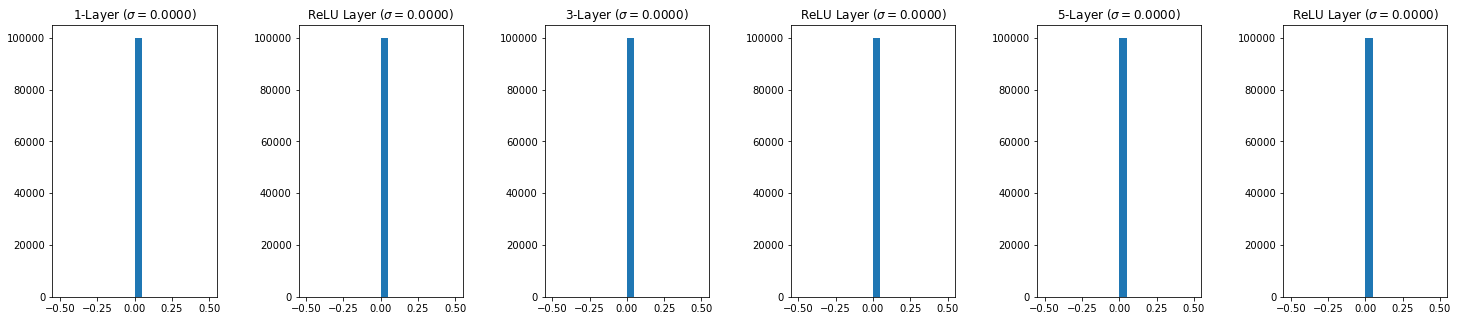

[0.5781, 96.76273333333334, 356302.5044, 1316477981.9561, 4864161736339.983]
[0.5701166666666667, 0.0, 0.0, 0.0, 0.0]


In [9]:
node_num = 100 #각 은닉층의 노드 수
num_layers = 6 # 3개의 은닉층 + 3개의 활성화층
num_epochs = 5

layers = OrderedDict()

for i in range(num_layers):
    if i % 2 == 0:
        w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
        b = np.random.randn(node_num) / np.sqrt(node_num)
        layers[i] = Affine(w, b)
    else:    
        layers[i] = Relu()


avg_forward_std, avg_backward_std = activation_value_histogram(layers, num_epochs)
avg_forward_std_dic['Xavier'] = avg_forward_std
avg_backward_std_dic['Xavier'] = avg_backward_std
print(avg_forward_std)
print(avg_backward_std)

### 5) He Initializer where Standard Deviation is $\sqrt{2 \over n}$ ($n$ is the number of neurons in the previous layer)
- Weight Distribution: $W \sim N(0, {2 \over n})$
- Bias Distribution: $B \sim N(0, {2 \over n})$

Epoch: 0
Forward Activations


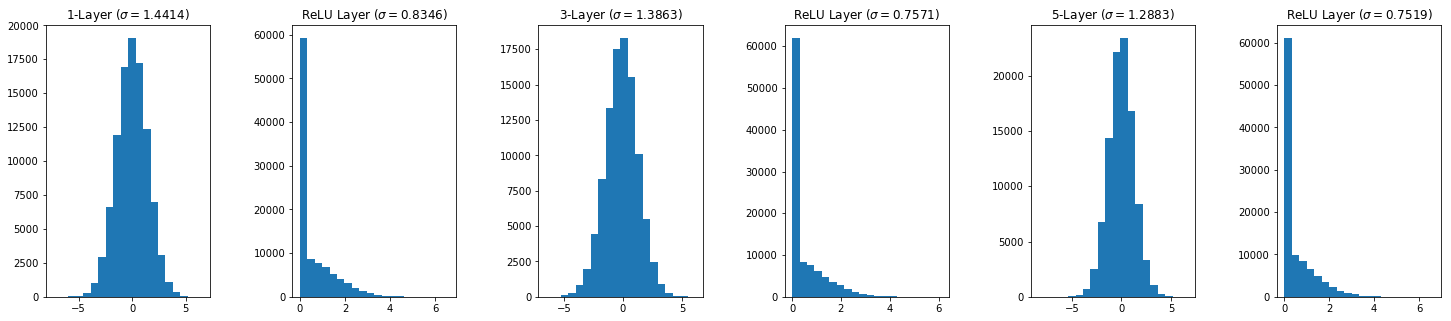

Backward Activations


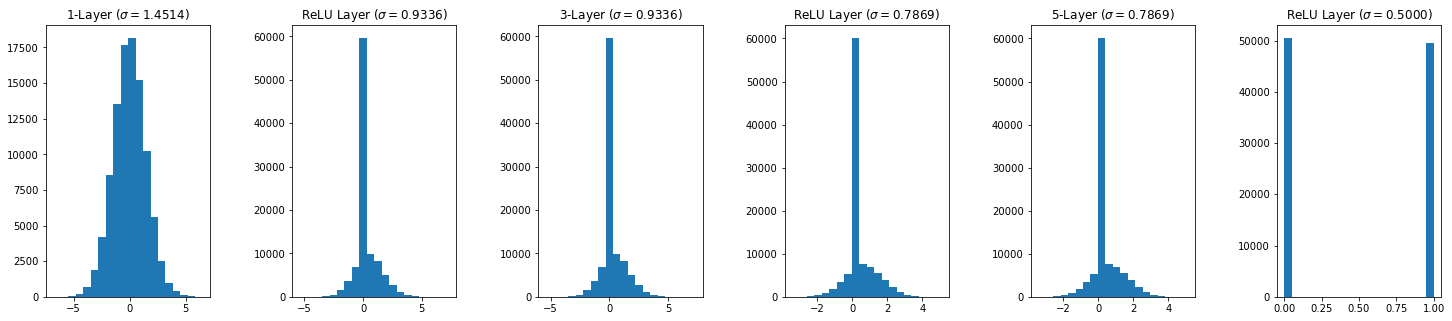

Epoch: 1
Forward Activations


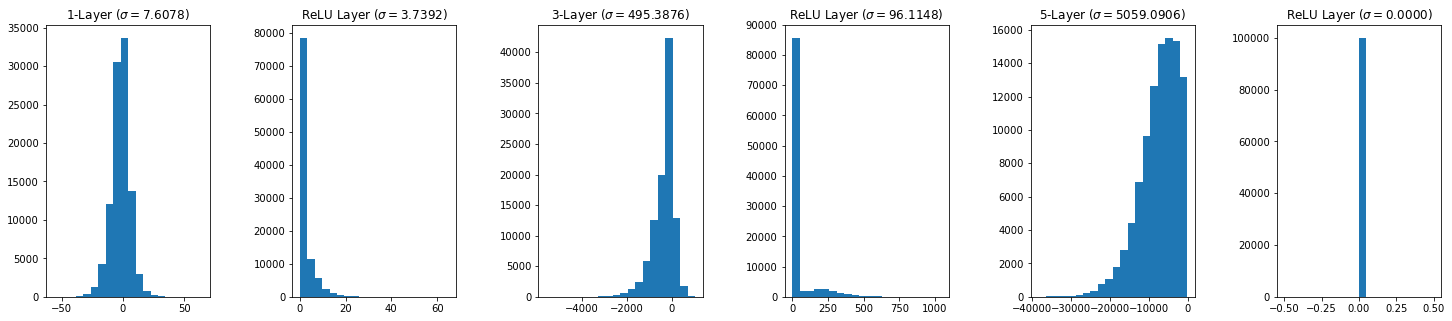

Backward Activations


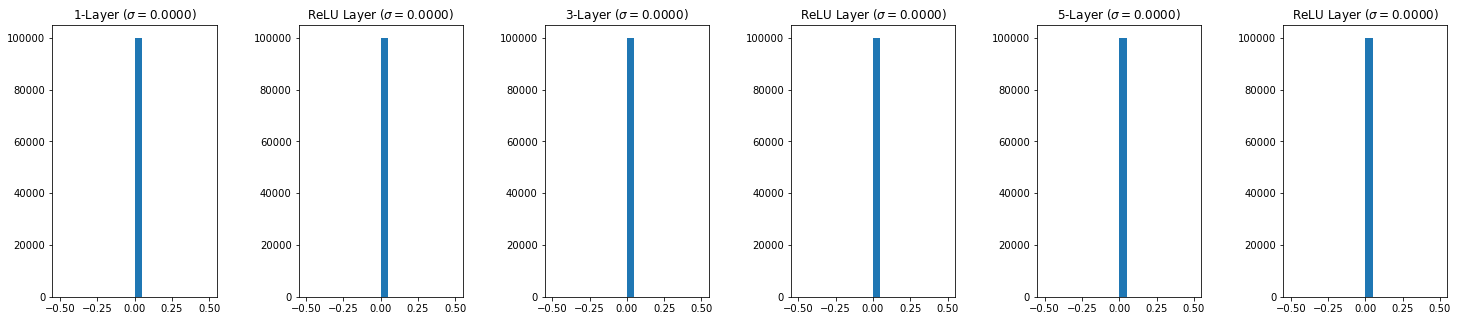

Epoch: 2
Forward Activations


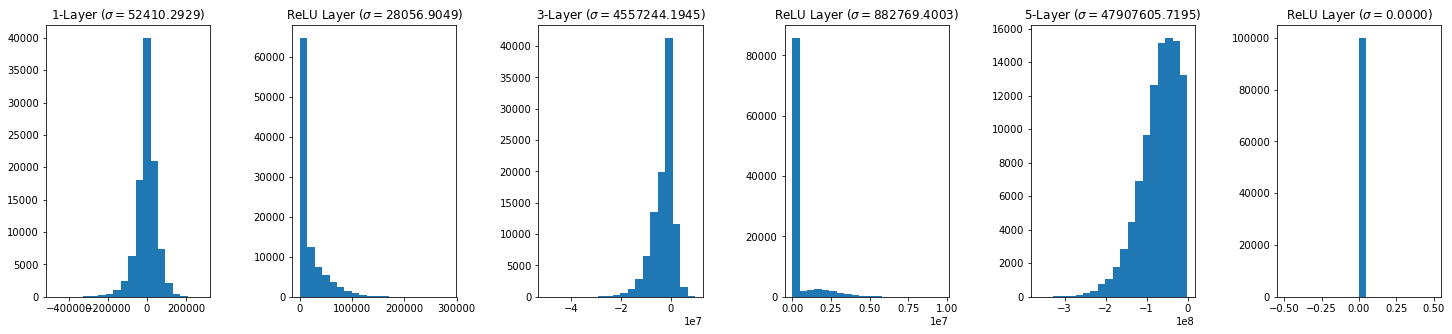

Backward Activations


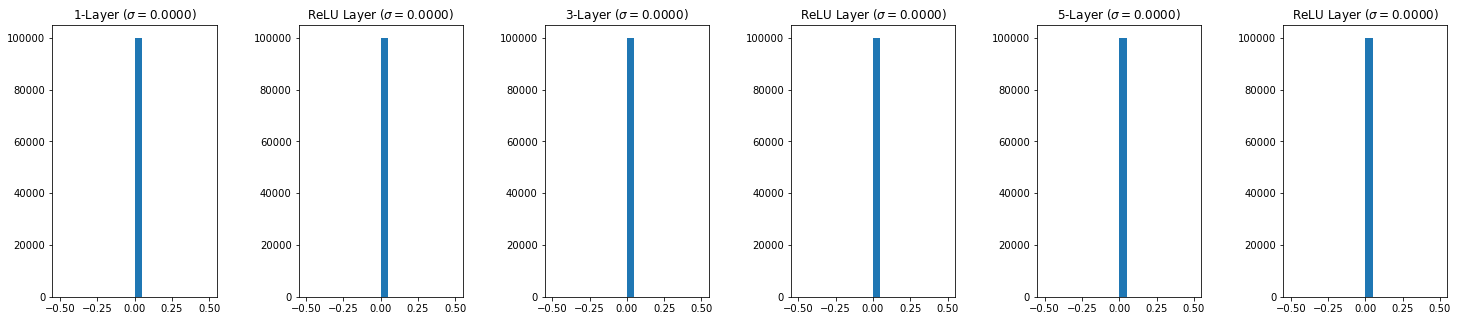

Epoch: 3
Forward Activations


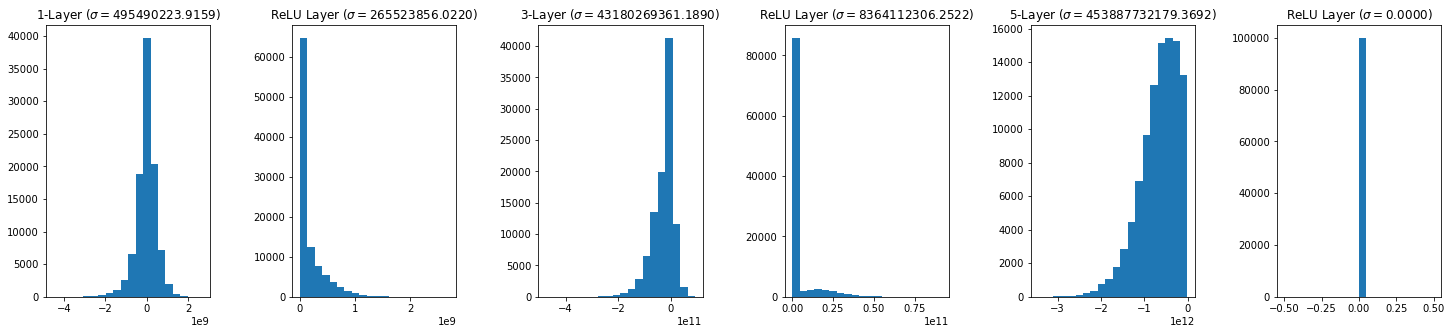

Backward Activations


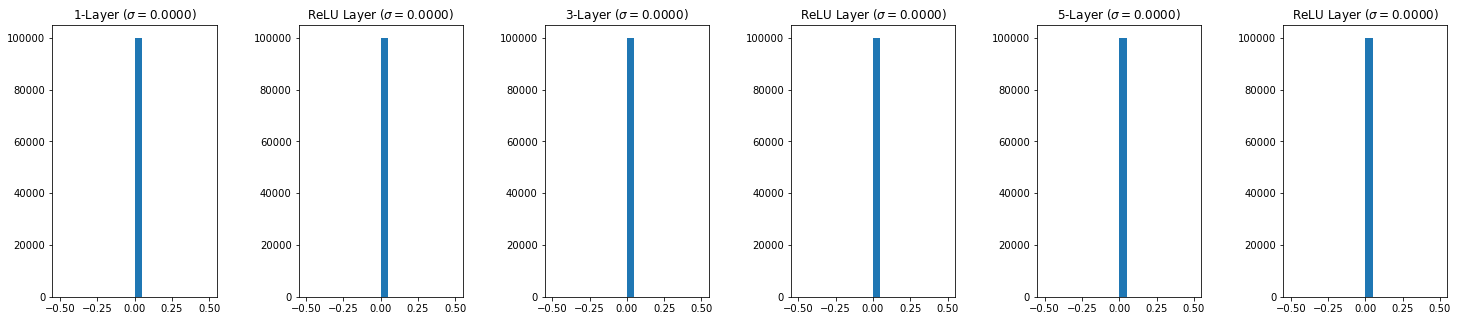

Epoch: 4
Forward Activations


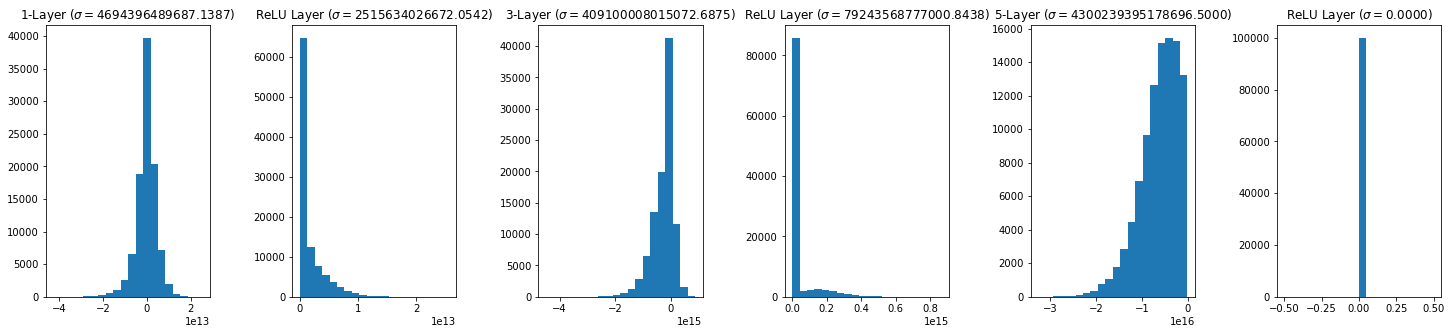

Backward Activations


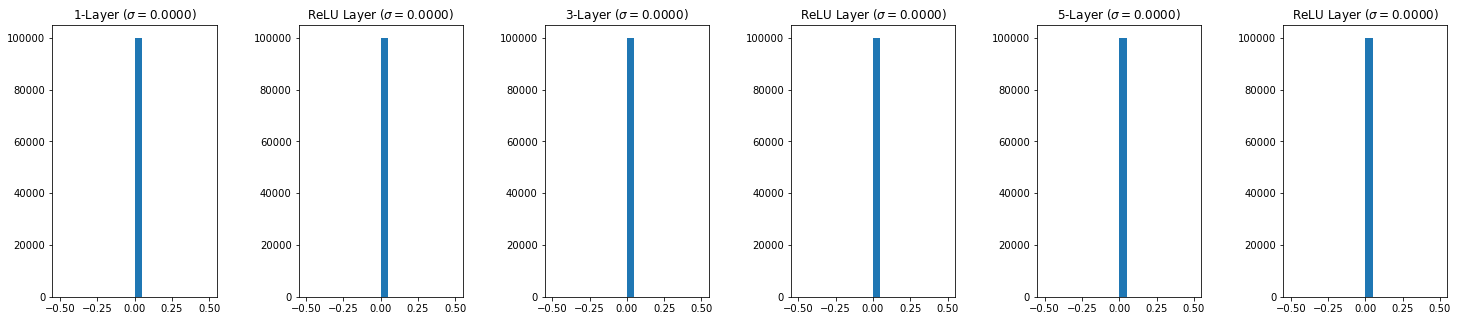

[1.0766000000000002, 943.6566666666668, 8904681.08535, 84365521321.12471, 799298833747854.9]
[0.8987333333333334, 0.0, 0.0, 0.0, 0.0]


In [10]:
node_num = 100 #각 은닉층의 노드 수
num_layers = 6 # 3개의 은닉층 + 3개의 활성화층
num_epochs = 5

layers = OrderedDict()

for i in range(num_layers):
    if i % 2 == 0:
        w = np.random.randn(node_num, node_num) * np.sqrt(2) / np.sqrt(node_num)
        b = np.random.randn(node_num) * np.sqrt(2)  / np.sqrt(node_num)
        layers[i] = Affine(w, b)
    else:    
        layers[i] = Relu()

avg_forward_std, avg_backward_std = activation_value_histogram(layers, num_epochs)
avg_forward_std_dic['He'] = avg_forward_std
avg_backward_std_dic['He'] = avg_backward_std
print(avg_forward_std)
print(avg_backward_std)

### Standard Deviation of Forward Activation Values per Epoch (0, 1, 2, 3, 4)

In [11]:
import pandas as pd
df = pd.DataFrame(avg_forward_std_dic)
df

,Zero,"N(0.0, 1.0)","N(0.0, 0.0001)",Xavier,He
0,0.0,1.558007e+02,0.032000,5.781000e-01,1.076600e+00
1,0.0,1.227419e+11,1.066567,9.676273e+01,9.436567e+02
2,0.0,3.202010e+20,1.657450,3.563025e+05,8.904681e+06
3,0.0,8.345582e+29,1.651800,1.316478e+09,8.436552e+10
4,0.0,2.175155e+39,1.639300,4.864162e+12,7.992988e+14


### Standard Deviation of Backward Activation Values per Epoch (0, 1, 2, 3, 4)

In [12]:
df = pd.DataFrame(avg_backward_std_dic)
df

,Zero,"N(0.0, 1.0)","N(0.0, 0.0001)",Xavier,He
0,0.0,113.37695,0.099950,0.570117,0.898733
1,0.0,0.00000,0.000283,0.000000,0.000000
2,0.0,0.00000,0.000000,0.000000,0.000000
3,0.0,0.00000,0.000000,0.000000,0.000000
4,0.0,0.00000,0.000000,0.000000,0.000000
